In [ ]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [ ]:
!gdown https://drive.google.com/u/1/uc?id=1lYFcahISKi2iU5wsIZ835lVVBwoNMCO2&export=download&confirm=t

Downloading...
From: https://drive.google.com/u/1/uc?id=1lYFcahISKi2iU5wsIZ835lVVBwoNMCO2
To: /content/dataset.zip
100% 379M/379M [00:10<00:00, 35.4MB/s]


In [ ]:
!unzip dataset.zip

Archive:  dataset.zip
   creating: dataset/
   creating: dataset/matching/
  inflating: dataset/matching/matching-3.jpg  
  inflating: dataset/matching/matching-4.jpg  
  inflating: dataset/matching/matching-5.jpg  
  inflating: dataset/matching/matching-7.jpg  
  inflating: dataset/matching/matching-9.jpg  
  inflating: dataset/matching/matching-13.jpg  
  inflating: dataset/matching/matching-14.jpg  
  inflating: dataset/matching/matching-16.jpg  
  inflating: dataset/matching/matching-17.jpg  
  inflating: dataset/matching/matching-18.jpg  
  inflating: dataset/matching/matching-19.jpg  
  inflating: dataset/matching/matching-20.jpg  
  inflating: dataset/matching/matching-23.jpg  
  inflating: dataset/matching/matching-29.jpg  
  inflating: dataset/matching/matching-31.jpg  
  inflating: dataset/matching/matching-33.jpg  
  inflating: dataset/matching/matching-34.jpg  
  inflating: dataset/matching/matching-37.jpg  
  inflating: dataset/matching/matching-38.jpg  
  inflating: datas

In [ ]:
ls

dataset/  dataset.zip  sample_data/


In [ ]:
import tensorflow as tf
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset_location='./dataset'
batch_size = 32
epochs = 100
validation_split = 0.2
input_shape = (392, 392, 3)
img_size = (392, 392)

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
        dataset_location,
        validation_split=validation_split,
        subset="training",
        seed=42,
        image_size=img_size,
        batch_size=batch_size)
    
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
        dataset_location,
        validation_split=validation_split,
        subset="validation",
        seed=42,
        image_size=img_size,
        batch_size=batch_size)

Found 4178 files belonging to 2 classes.
Using 3343 files for training.
Found 4178 files belonging to 2 classes.
Using 835 files for validation.


In [ ]:
'''
data_augmentation = tf.keras.Sequential([
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),

])
    
train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))
val_ds = val_ds.map(lambda x, y: (data_augmentation(x, training=True), y))
'''

'\ndata_augmentation = tf.keras.Sequential([\n        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),\n        tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),\n\n])\n    \ntrain_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))\nval_ds = val_ds.map(lambda x, y: (data_augmentation(x, training=True), y))\n'

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

In [ ]:
model = tf.keras.Sequential([
        tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=input_shape),
        tf.keras.layers.Conv2D(32, 3, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, 3, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(128, 3, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(1, activation='sigmoid')
])
    

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 392, 392, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 390, 390, 32)      896       
                                                                 
 batch_normalization_4 (Batc  (None, 390, 390, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 195, 195, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 193, 193, 64)      18496     
                                                                 
 batch_normalization_5 (Batc  (None, 193, 193, 64)    

In [ ]:
model.compile(
        optimizer='adam',
        loss=tf.losses.BinaryCrossentropy(),
        metrics=['accuracy'])

In [ ]:
history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=epochs
        )

Epoch 1/100
105/105 [==============================] - 35s 297ms/step - loss: 8.9569 - accuracy: 0.4906 - val_loss: 2.2953 - val_accuracy: 0.5030
Epoch 2/100
105/105 [==============================] - 30s 277ms/step - loss: 2.1185 - accuracy: 0.4900 - val_loss: 1.9485 - val_accuracy: 0.4970
Epoch 3/100
105/105 [==============================] - 30s 277ms/step - loss: 1.8347 - accuracy: 0.4942 - val_loss: 1.7789 - val_accuracy: 0.5030
Epoch 4/100
105/105 [==============================] - 30s 278ms/step - loss: 1.6538 - accuracy: 0.5040 - val_loss: 1.5373 - val_accuracy: 0.4982
Epoch 5/100
105/105 [==============================] - 30s 275ms/step - loss: 1.4726 - accuracy: 0.5031 - val_loss: 1.4147 - val_accuracy: 0.5030
Epoch 6/100
105/105 [==============================] - 30s 276ms/step - loss: 1.3706 - accuracy: 0.5076 - val_loss: 1.3857 - val_accuracy: 0.5030
Epoch 7/100
105/105 [==============================] - 30s 275ms/step - loss: 1.3439 - accuracy: 0.4912 - val_loss: 1.3196 -

In [ ]:
!pip install h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import h5py
model.save("/content/model.h5")

In [ ]:
loss_train, acc_train = model.evaluate(train_ds)
loss_val, acc_val = model.evaluate(val_ds)

print("Train accuracy: ", acc_train)
print("Validation accuracy: ", acc_val)

27/27 [==============================] - 5s 115ms/step - loss: 2.5194 - accuracy: 0.4731
Train accuracy:  0.9985043406486511
Validation accuracy:  0.473053902387619


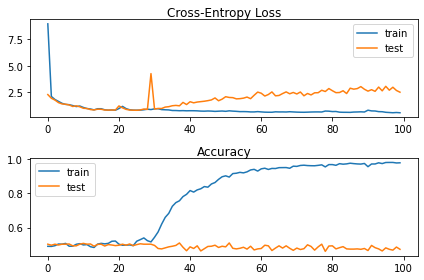

In [ ]:
# plot loss learning curves
plt.subplot(211)
plt.title('Cross-Entropy Loss', pad=-40)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# plot accuracy learning curves
plt.subplot(212)
plt.title('Accuracy', pad=-40)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.tight_layout()
plt.show()